In [1]:
from typing import Optional, List, Dict
import os
import time
%matplotlib inline
if "hh_combination_fw_path" not in os.environ:
    os.environ['hh_combination_fw_path'] = os.path.abspath("../../")

In [46]:
config = {
    'inputdir': '/eos/atlas/atlascerngroupdisk/phys-hdbs/diHiggs/combination/FullRun2Workspaces/original/PUBHEFT2022/20220223_HEFT_oldCDI',
    # change your output directory here
    'outdir': os.path.join(os.environ['hh_combination_fw_path'], "outputs"),
    'parameters':['cgghh', 'ctthh'],
    'channels': ['bbyy', 'bbtautau'],
    'resonant_type': 'nonres',
    'file_expr': {
        'cgghh': '<mass[F]>_cgghh_<cgghh[P]>',
        'ctthh': '<mass[F]>_ctthh_<ctthh[P]>'
    },
    'correlation_scheme': 'HEFT_nonres_v1.json',
    'task_option': 'HEFT_nonres_v1.yaml',
    'parallel': -1
}

In [47]:
def construct_commands(config:Dict):
    channels = ','.join(config['channels'])
    hhcomb_path = os.environ.get('hh_combination_fw_path', None)
    if hhcomb_path is None:
        raise RuntimeError("hh combination framework is not set up properly, please run setup.sh first")
    task_option_path = os.path.join(hhcomb_path, "configs", "task_options", config['task_option'])
    correlation_scheme_path = os.path.join(hhcomb_path, "configs", "correlation_schemes", config['correlation_scheme'])
    if not os.path.exists(task_option_path):
        raise FileNotFoundError(f"file \"{task_option_path}\" does not exist")
    if not os.path.exists(correlation_scheme_path):
        raise FileNotFoundError(f"file \"{correlation_scheme_path}\" does not exist")
    commands = {}
    for parameter in config['parameters']:
        commands[parameter] = []
        file_expr = config['file_expr'][parameter]
        input_path = os.path.join(config['inputdir'], parameter)
        output_path = os.path.join(config['outdir'], parameter)
        # process channels
        command_channel = f"HHComb process_channels -i {input_path} -c \"{channels}\" -r {config['resonant_type']} " +\
                          f"-o {output_path} --file_expr \"{file_expr}\" --config {task_option_path} " +\
                          f"--parallel {config['parallel']} --unblind"
        commands[parameter].append(command_channel)
        # combination
        command_comb = f"HHComb combine_ws -i {output_path} -s {correlation_scheme_path} -c \"{channels}\" " +\
                       f"-r {config['resonant_type']} --file_expr \"{file_expr}\" --config {task_option_path} " +\
                       f"--parallel {config['parallel']} --unblind"
        commands[parameter].append(command_comb)
    return commands

In [48]:
commands = construct_commands(config)

In [49]:
for parameter in commands:
    print(f"# commands for running {parameter} parameter scan")
    for sub_command in commands[parameter]:
        print("")
        print(sub_command)
    print("")

# commands for running cgghh parameter scan

HHComb process_channels -i /eos/atlas/atlascerngroupdisk/phys-hdbs/diHiggs/combination/FullRun2Workspaces/original/PUBHEFT2022/20220223_HEFT_oldCDI/cgghh -c "bbyy,bbtautau" -r nonres -o /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs/cgghh --file_expr "<mass[F]>_cgghh_<cgghh[P]>" --config /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/configs/task_options/HEFT_nonres_v1.yaml --parallel -1 --unblind

HHComb combine_ws -i /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs/cgghh -s /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/configs/correlation_schemes/HEFT_nonres_v1.json -c "bbyy,bbtautau" -r nonres --file_expr "<mass[F]>_cgghh_<cgghh[P]>" --config /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/configs/task_options/HEFT_nonres_v1.yaml --parallel -1 --unblind

# commands for running ctthh parameter scan

HHComb proces

In [6]:
start = time.time()
for parameter in commands:
    for sub_command in commands[parameter]:
        !{sub_command}
end = time.time()


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt

INFO: Regularising /eos/atlas/atlascerngroupdisk/phys-hdbs/diHiggs/combination/FullRun2Workspaces/original/20220204_HEFT/cgghh/bbtautau/nonres/0_cgghh_n2p0.root --> /afs/cern.ch/work/c/chlcheng/Repository/hh_combination_fw/tutorials/HEFT_combination/outputs/cgghh/regularised/nonres/bbtautau/0_cgghh_n2p0.root
/afs/cern.ch/work/c/chlcheng/Repository/hh_combination_fw/submodules/workspaceCombiner/bin/manager -w decorate -f /eos/atlas/atlascerngroupdisk/phys-hdbs/diHiggs/combination/FullRun2Workspaces/original/20220204_HEFT/cgghh/bbtautau/nonres/0_cgghh_n2p0.root -p /afs/cern.ch/work/c/chlcheng/Repository/hh_combination_fw/tutorials/HEFT_combination/outputs/cgghh/regularised/nonres/bbtautau/0_cgghh_n2p0.root -d asimovData
INFO: Regularising /e

INFO: Creating config file: /afs/cern.ch/work/c/chlcheng/Repository/hh_combination_fw/tutorials/HEFT_combination/outputs/cgghh/cfg/rescale/nonres/bbtautau/0_cgghh_n0p8.xml, poi: SigXsecOverSM --> xsec_br, scaling: 1.0
INFO: Creating config file: /afs/cern.ch/work/c/chlcheng/Repository/hh_combination_fw/tutorials/HEFT_combination/outputs/cgghh/cfg/rescale/nonres/bbtautau/0_cgghh_n0p6.xml, poi: SigXsecOverSM --> xsec_br, scaling: 1.0
INFO: Creating config file: /afs/cern.ch/work/c/chlcheng/Repository/hh_combination_fw/tutorials/HEFT_combination/outputs/cgghh/cfg/rescale/nonres/bbtautau/0_cgghh_0p6.xml, poi: SigXsecOverSM --> xsec_br, scaling: 1.0
INFO: Creating config file: /afs/cern.ch/work/c/chlcheng/Repository/hh_combination_fw/tutorials/HEFT_combination/outputs/cgghh/cfg/rescale/nonres/bbtautau/0_cgghh_n1p0.xml, poi: SigXsecOverSM --> xsec_br, scaling: 1.0
INFO: Creating config file: /afs/cern.ch/work/c/chlcheng/Repository/hh_combination_fw/tutorials/HEFT_combination/outputs/cgghh/cf

INFO: Writing rescaling log into /afs/cern.ch/work/c/chlcheng/Repository/hh_combination_fw/tutorials/HEFT_combination/outputs/cgghh/rescaled/nonres/bbtautau/0_cgghh_n1p2.log
INFO: Writing rescaling log into /afs/cern.ch/work/c/chlcheng/Repository/hh_combination_fw/tutorials/HEFT_combination/outputs/cgghh/rescaled/nonres/bbtautau/0_cgghh_n1p8.log
/afs/cern.ch/work/c/chlcheng/Repository/hh_combination_fw/submodules/workspaceCombiner/bin/manager -w organize -x /afs/cern.ch/work/c/chlcheng/Repository/hh_combination_fw/tutorials/HEFT_combination/outputs/cgghh/cfg/rescale/nonres/bbtautau/0_cgghh_n1p6.xml
INFO: Writing rescaling log into /afs/cern.ch/work/c/chlcheng/Repository/hh_combination_fw/tutorials/HEFT_combination/outputs/cgghh/rescaled/nonres/bbtautau/0_cgghh_n1p6.log
INFO: Regularising /eos/atlas/atlascerngroupdisk/phys-hdbs/diHiggs/combination/FullRun2Workspaces/original/20220204_HEFT/cgghh/bbtautau/nonres/0_cgghh_1p2.root --> /afs/cern.ch/work/c/chlcheng/Repository/hh_combination_f

INFO: Evaluating limit for the workspace /afs/cern.ch/work/c/chlcheng/Repository/hh_combination_fw/tutorials/HEFT_combination/outputs/cgghh/rescaled/nonres/bbtautau/0_cgghh_n2p0.root (mass=0, cgghh=-2.0)
INFO: Evaluating limit for the workspace /afs/cern.ch/work/c/chlcheng/Repository/hh_combination_fw/tutorials/HEFT_combination/outputs/cgghh/rescaled/nonres/bbtautau/0_cgghh_n1p8.root (mass=0, cgghh=-1.8)
INFO: Evaluating limit for the workspace /afs/cern.ch/work/c/chlcheng/Repository/hh_combination_fw/tutorials/HEFT_combination/outputs/cgghh/rescaled/nonres/bbtautau/0_cgghh_n1p6.root (mass=0, cgghh=-1.6)
INFO: Evaluating limit for the workspace /afs/cern.ch/work/c/chlcheng/Repository/hh_combination_fw/tutorials/HEFT_combination/outputs/cgghh/rescaled/nonres/bbtautau/0_cgghh_n1p4.root (mass=0, cgghh=-1.4)
INFO: Evaluating limit for the workspace /afs/cern.ch/work/c/chlcheng/Repository/hh_combination_fw/tutorials/HEFT_combination/outputs/cgghh/rescaled/nonres/bbtautau/0_cgghh_n1p2.root (

INFO: Creating config file: /afs/cern.ch/work/c/chlcheng/Repository/hh_combination_fw/tutorials/HEFT_combination/outputs/cgghh/cfg/rescale/nonres/bbyy/0_cgghh_n0p8.xml, poi: mu_XS_HH --> xsec_br, scaling: 1.0
INFO: Creating config file: /afs/cern.ch/work/c/chlcheng/Repository/hh_combination_fw/tutorials/HEFT_combination/outputs/cgghh/cfg/rescale/nonres/bbyy/0_cgghh_n1p2.xml, poi: mu_XS_HH --> xsec_br, scaling: 1.0
INFO: Creating config file: /afs/cern.ch/work/c/chlcheng/Repository/hh_combination_fw/tutorials/HEFT_combination/outputs/cgghh/cfg/rescale/nonres/bbyy/0_cgghh_0p4.xml, poi: mu_XS_HH --> xsec_br, scaling: 1.0
INFO: Creating config file: /afs/cern.ch/work/c/chlcheng/Repository/hh_combination_fw/tutorials/HEFT_combination/outputs/cgghh/cfg/rescale/nonres/bbyy/0_cgghh_n1p0.xml, poi: mu_XS_HH --> xsec_br, scaling: 1.0
INFO: Creating config file: /afs/cern.ch/work/c/chlcheng/Repository/hh_combination_fw/tutorials/HEFT_combination/outputs/cgghh/cfg/rescale/nonres/bbyy/0_cgghh_n0p2.x

INFO: Regularising /eos/atlas/atlascerngroupdisk/phys-hdbs/diHiggs/combination/FullRun2Workspaces/original/20220204_HEFT/cgghh/bbyy/nonres/0_cgghh_1p2.root --> /afs/cern.ch/work/c/chlcheng/Repository/hh_combination_fw/tutorials/HEFT_combination/outputs/cgghh/regularised/nonres/bbyy/0_cgghh_1p2.root
/afs/cern.ch/work/c/chlcheng/Repository/hh_combination_fw/submodules/workspaceCombiner/bin/manager -w decorate -f /eos/atlas/atlascerngroupdisk/phys-hdbs/diHiggs/combination/FullRun2Workspaces/original/20220204_HEFT/cgghh/bbyy/nonres/0_cgghh_1p2.root -p /afs/cern.ch/work/c/chlcheng/Repository/hh_combination_fw/tutorials/HEFT_combination/outputs/cgghh/regularised/nonres/bbyy/0_cgghh_1p2.root -d combData
INFO: Writing regularisation log into /afs/cern.ch/work/c/chlcheng/Repository/hh_combination_fw/tutorials/HEFT_combination/outputs/cgghh/regularised/nonres/bbyy/0_cgghh_1p2.log
INFO: Regularising /eos/atlas/atlascerngroupdisk/phys-hdbs/diHiggs/combination/FullRun2Workspaces/original/20220204_H

INFO: Evaluating limit for the workspace /afs/cern.ch/work/c/chlcheng/Repository/hh_combination_fw/tutorials/HEFT_combination/outputs/cgghh/rescaled/nonres/bbyy/0_cgghh_1p2.root (mass=0, cgghh=1.2)
INFO: Evaluating limit for the workspace /afs/cern.ch/work/c/chlcheng/Repository/hh_combination_fw/tutorials/HEFT_combination/outputs/cgghh/rescaled/nonres/bbyy/0_cgghh_1p4.root (mass=0, cgghh=1.4)
INFO: Evaluating limit for the workspace /afs/cern.ch/work/c/chlcheng/Repository/hh_combination_fw/tutorials/HEFT_combination/outputs/cgghh/rescaled/nonres/bbyy/0_cgghh_1p6.root (mass=0, cgghh=1.6)
INFO: Evaluating limit for the workspace /afs/cern.ch/work/c/chlcheng/Repository/hh_combination_fw/tutorials/HEFT_combination/outputs/cgghh/rescaled/nonres/bbyy/0_cgghh_1p8.root (mass=0, cgghh=1.8)
INFO: Evaluating limit for the workspace /afs/cern.ch/work/c/chlcheng/Repository/hh_combination_fw/tutorials/HEFT_combination/outputs/cgghh/rescaled/nonres/bbyy/0_cgghh_2p0.root (mass=0, cgghh=2.0)
INFO: Task

/afs/cern.ch/work/c/chlcheng/Repository/hh_combination_fw/submodules/workspaceCombiner/bin/manager -w combine -x /afs/cern.ch/work/c/chlcheng/Repository/hh_combination_fw/tutorials/HEFT_combination/outputs/cgghh/cfg/combination/nonres/A-bbtautau_bbyy-fullcorr/0_cgghh_0p0.xml -f /afs/cern.ch/work/c/chlcheng/Repository/hh_combination_fw/tutorials/HEFT_combination/outputs/cgghh/combined/nonres/A-bbtautau_bbyy-fullcorr/0_cgghh_0p0.root -s 0 -t -1
INFO: Writing combination log into /afs/cern.ch/work/c/chlcheng/Repository/hh_combination_fw/tutorials/HEFT_combination/outputs/cgghh/combined/nonres/A-bbtautau_bbyy-fullcorr/0_cgghh_0p0.log
INFO: Combination config for the point "mass=0,cgghh=-1.8" saved as "/afs/cern.ch/work/c/chlcheng/Repository/hh_combination_fw/tutorials/HEFT_combination/outputs/cgghh/cfg/combination/nonres/A-bbtautau_bbyy-fullcorr/0_cgghh_n1p8.xml"
/afs/cern.ch/work/c/chlcheng/Repository/hh_combination_fw/submodules/workspaceCombiner/bin/manager -w combine -x /afs/cern.ch/wo

INFO: Evaluating limit for the workspace /afs/cern.ch/work/c/chlcheng/Repository/hh_combination_fw/tutorials/HEFT_combination/outputs/cgghh/combined/nonres/A-bbtautau_bbyy-fullcorr/0_cgghh_1p2.root (mass=0, cgghh=1.2)
INFO: Evaluating limit for the workspace /afs/cern.ch/work/c/chlcheng/Repository/hh_combination_fw/tutorials/HEFT_combination/outputs/cgghh/combined/nonres/A-bbtautau_bbyy-fullcorr/0_cgghh_1p4.root (mass=0, cgghh=1.4)
INFO: Evaluating limit for the workspace /afs/cern.ch/work/c/chlcheng/Repository/hh_combination_fw/tutorials/HEFT_combination/outputs/cgghh/combined/nonres/A-bbtautau_bbyy-fullcorr/0_cgghh_1p6.root (mass=0, cgghh=1.6)
INFO: Evaluating limit for the workspace /afs/cern.ch/work/c/chlcheng/Repository/hh_combination_fw/tutorials/HEFT_combination/outputs/cgghh/combined/nonres/A-bbtautau_bbyy-fullcorr/0_cgghh_1p8.root (mass=0, cgghh=1.8)
INFO: Evaluating limit for the workspace /afs/cern.ch/work/c/chlcheng/Repository/hh_combination_fw/tutorials/HEFT_combination/ou

INFO: Regularising /eos/atlas/atlascerngroupdisk/phys-hdbs/diHiggs/combination/FullRun2Workspaces/original/20220204_HEFT/ctthh/bbtautau/nonres/0_ctthh_n0p2.root --> /afs/cern.ch/work/c/chlcheng/Repository/hh_combination_fw/tutorials/HEFT_combination/outputs/ctthh/regularised/nonres/bbtautau/0_ctthh_n0p2.root
/afs/cern.ch/work/c/chlcheng/Repository/hh_combination_fw/submodules/workspaceCombiner/bin/manager -w decorate -f /eos/atlas/atlascerngroupdisk/phys-hdbs/diHiggs/combination/FullRun2Workspaces/original/20220204_HEFT/ctthh/bbtautau/nonres/0_ctthh_n0p2.root -p /afs/cern.ch/work/c/chlcheng/Repository/hh_combination_fw/tutorials/HEFT_combination/outputs/ctthh/regularised/nonres/bbtautau/0_ctthh_n0p2.root -d asimovData
INFO: Writing regularisation log into /afs/cern.ch/work/c/chlcheng/Repository/hh_combination_fw/tutorials/HEFT_combination/outputs/ctthh/regularised/nonres/bbtautau/0_ctthh_n0p2.log
INFO: Regularising /eos/atlas/atlascerngroupdisk/phys-hdbs/diHiggs/combination/FullRun2Wor

INFO: Creating config file: /afs/cern.ch/work/c/chlcheng/Repository/hh_combination_fw/tutorials/HEFT_combination/outputs/ctthh/cfg/rescale/nonres/bbtautau/0_ctthh_n0p6.xml, poi: SigXsecOverSM --> xsec_br, scaling: 1.0
INFO: Creating config file: /afs/cern.ch/work/c/chlcheng/Repository/hh_combination_fw/tutorials/HEFT_combination/outputs/ctthh/cfg/rescale/nonres/bbtautau/0_ctthh_1p0.xml, poi: SigXsecOverSM --> xsec_br, scaling: 1.0
INFO: Creating config file: /afs/cern.ch/work/c/chlcheng/Repository/hh_combination_fw/tutorials/HEFT_combination/outputs/ctthh/cfg/rescale/nonres/bbtautau/0_ctthh_n1p6.xml, poi: SigXsecOverSM --> xsec_br, scaling: 1.0
INFO: Creating config file: /afs/cern.ch/work/c/chlcheng/Repository/hh_combination_fw/tutorials/HEFT_combination/outputs/ctthh/cfg/rescale/nonres/bbtautau/0_ctthh_n0p2.xml, poi: SigXsecOverSM --> xsec_br, scaling: 1.0
INFO: Creating config file: /afs/cern.ch/work/c/chlcheng/Repository/hh_combination_fw/tutorials/HEFT_combination/outputs/ctthh/cf

INFO: Regularising /eos/atlas/atlascerngroupdisk/phys-hdbs/diHiggs/combination/FullRun2Workspaces/original/20220204_HEFT/ctthh/bbtautau/nonres/0_ctthh_1p2.root --> /afs/cern.ch/work/c/chlcheng/Repository/hh_combination_fw/tutorials/HEFT_combination/outputs/ctthh/regularised/nonres/bbtautau/0_ctthh_1p2.root
/afs/cern.ch/work/c/chlcheng/Repository/hh_combination_fw/submodules/workspaceCombiner/bin/manager -w decorate -f /eos/atlas/atlascerngroupdisk/phys-hdbs/diHiggs/combination/FullRun2Workspaces/original/20220204_HEFT/ctthh/bbtautau/nonres/0_ctthh_1p2.root -p /afs/cern.ch/work/c/chlcheng/Repository/hh_combination_fw/tutorials/HEFT_combination/outputs/ctthh/regularised/nonres/bbtautau/0_ctthh_1p2.root -d asimovData
INFO: Writing regularisation log into /afs/cern.ch/work/c/chlcheng/Repository/hh_combination_fw/tutorials/HEFT_combination/outputs/ctthh/regularised/nonres/bbtautau/0_ctthh_1p2.log
INFO: Regularising /eos/atlas/atlascerngroupdisk/phys-hdbs/diHiggs/combination/FullRun2Workspac

INFO: Evaluating limit for the workspace /afs/cern.ch/work/c/chlcheng/Repository/hh_combination_fw/tutorials/HEFT_combination/outputs/ctthh/rescaled/nonres/bbtautau/0_ctthh_n0p2.root (mass=0, ctthh=-0.2)
INFO: Evaluating limit for the workspace /afs/cern.ch/work/c/chlcheng/Repository/hh_combination_fw/tutorials/HEFT_combination/outputs/ctthh/rescaled/nonres/bbtautau/0_ctthh_0p0.root (mass=0, ctthh=0.0)
INFO: Evaluating limit for the workspace /afs/cern.ch/work/c/chlcheng/Repository/hh_combination_fw/tutorials/HEFT_combination/outputs/ctthh/rescaled/nonres/bbtautau/0_ctthh_0p2.root (mass=0, ctthh=0.2)
INFO: Evaluating limit for the workspace /afs/cern.ch/work/c/chlcheng/Repository/hh_combination_fw/tutorials/HEFT_combination/outputs/ctthh/rescaled/nonres/bbtautau/0_ctthh_0p4.root (mass=0, ctthh=0.4)
INFO: Evaluating limit for the workspace /afs/cern.ch/work/c/chlcheng/Repository/hh_combination_fw/tutorials/HEFT_combination/outputs/ctthh/rescaled/nonres/bbtautau/0_ctthh_0p6.root (mass=0,

/afs/cern.ch/work/c/chlcheng/Repository/hh_combination_fw/submodules/workspaceCombiner/bin/manager -w decorate -f /eos/atlas/atlascerngroupdisk/phys-hdbs/diHiggs/combination/FullRun2Workspaces/original/20220204_HEFT/ctthh/bbyy/nonres/0_ctthh_0p8.root -p /afs/cern.ch/work/c/chlcheng/Repository/hh_combination_fw/tutorials/HEFT_combination/outputs/ctthh/regularised/nonres/bbyy/0_ctthh_0p8.root -d combData
INFO: Writing regularisation log into /afs/cern.ch/work/c/chlcheng/Repository/hh_combination_fw/tutorials/HEFT_combination/outputs/ctthh/regularised/nonres/bbyy/0_ctthh_n0p2.log
INFO: Regularising /eos/atlas/atlascerngroupdisk/phys-hdbs/diHiggs/combination/FullRun2Workspaces/original/20220204_HEFT/ctthh/bbyy/nonres/0_ctthh_1p0.root --> /afs/cern.ch/work/c/chlcheng/Repository/hh_combination_fw/tutorials/HEFT_combination/outputs/ctthh/regularised/nonres/bbyy/0_ctthh_1p0.root
/afs/cern.ch/work/c/chlcheng/Repository/hh_combination_fw/submodules/workspaceCombiner/bin/manager -w decorate -f /e

/afs/cern.ch/work/c/chlcheng/Repository/hh_combination_fw/submodules/workspaceCombiner/bin/manager -w organize -x /afs/cern.ch/work/c/chlcheng/Repository/hh_combination_fw/tutorials/HEFT_combination/outputs/ctthh/cfg/rescale/nonres/bbyy/0_ctthh_0p0.xml
/afs/cern.ch/work/c/chlcheng/Repository/hh_combination_fw/submodules/workspaceCombiner/bin/manager -w organize -x /afs/cern.ch/work/c/chlcheng/Repository/hh_combination_fw/tutorials/HEFT_combination/outputs/ctthh/cfg/rescale/nonres/bbyy/0_ctthh_n1p2.xml
INFO: Writing rescaling log into /afs/cern.ch/work/c/chlcheng/Repository/hh_combination_fw/tutorials/HEFT_combination/outputs/ctthh/rescaled/nonres/bbyy/0_ctthh_0p0.log
/afs/cern.ch/work/c/chlcheng/Repository/hh_combination_fw/submodules/workspaceCombiner/bin/manager -w organize -x /afs/cern.ch/work/c/chlcheng/Repository/hh_combination_fw/tutorials/HEFT_combination/outputs/ctthh/cfg/rescale/nonres/bbyy/0_ctthh_n2p0.xml
INFO: Writing rescaling log into /afs/cern.ch/work/c/chlcheng/Reposito

INFO: Creating config file: /afs/cern.ch/work/c/chlcheng/Repository/hh_combination_fw/tutorials/HEFT_combination/outputs/ctthh/cfg/rescale/nonres/bbyy/0_ctthh_1p2.xml, poi: mu_XS_HH --> xsec_br, scaling: 1.0
INFO: Creating config file: /afs/cern.ch/work/c/chlcheng/Repository/hh_combination_fw/tutorials/HEFT_combination/outputs/ctthh/cfg/rescale/nonres/bbyy/0_ctthh_1p8.xml, poi: mu_XS_HH --> xsec_br, scaling: 1.0
INFO: Creating config file: /afs/cern.ch/work/c/chlcheng/Repository/hh_combination_fw/tutorials/HEFT_combination/outputs/ctthh/cfg/rescale/nonres/bbyy/0_ctthh_1p6.xml, poi: mu_XS_HH --> xsec_br, scaling: 1.0
INFO: Creating config file: /afs/cern.ch/work/c/chlcheng/Repository/hh_combination_fw/tutorials/HEFT_combination/outputs/ctthh/cfg/rescale/nonres/bbyy/0_ctthh_1p4.xml, poi: mu_XS_HH --> xsec_br, scaling: 1.0
INFO: Creating config file: /afs/cern.ch/work/c/chlcheng/Repository/hh_combination_fw/tutorials/HEFT_combination/outputs/ctthh/cfg/rescale/nonres/bbyy/0_ctthh_2p0.xml, 

INFO: Combination config for the point "mass=0,ctthh=-1.4" saved as "/afs/cern.ch/work/c/chlcheng/Repository/hh_combination_fw/tutorials/HEFT_combination/outputs/ctthh/cfg/combination/nonres/A-bbtautau_bbyy-fullcorr/0_ctthh_n1p4.xml"
/afs/cern.ch/work/c/chlcheng/Repository/hh_combination_fw/submodules/workspaceCombiner/bin/manager -w combine -x /afs/cern.ch/work/c/chlcheng/Repository/hh_combination_fw/tutorials/HEFT_combination/outputs/ctthh/cfg/combination/nonres/A-bbtautau_bbyy-fullcorr/0_ctthh_n1p4.xml -f /afs/cern.ch/work/c/chlcheng/Repository/hh_combination_fw/tutorials/HEFT_combination/outputs/ctthh/combined/nonres/A-bbtautau_bbyy-fullcorr/0_ctthh_n1p4.root -s 0 -t -1
INFO: Writing combination log into /afs/cern.ch/work/c/chlcheng/Repository/hh_combination_fw/tutorials/HEFT_combination/outputs/ctthh/combined/nonres/A-bbtautau_bbyy-fullcorr/0_ctthh_n1p4.log
INFO: Combination config for the point "mass=0,ctthh=-1.6" saved as "/afs/cern.ch/work/c/chlcheng/Repository/hh_combination_f

INFO: Combination config for the point "mass=0,ctthh=0.2" saved as "/afs/cern.ch/work/c/chlcheng/Repository/hh_combination_fw/tutorials/HEFT_combination/outputs/ctthh/cfg/combination/nonres/A-bbtautau_bbyy-fullcorr/0_ctthh_0p2.xml"
/afs/cern.ch/work/c/chlcheng/Repository/hh_combination_fw/submodules/workspaceCombiner/bin/manager -w combine -x /afs/cern.ch/work/c/chlcheng/Repository/hh_combination_fw/tutorials/HEFT_combination/outputs/ctthh/cfg/combination/nonres/A-bbtautau_bbyy-fullcorr/0_ctthh_0p2.xml -f /afs/cern.ch/work/c/chlcheng/Repository/hh_combination_fw/tutorials/HEFT_combination/outputs/ctthh/combined/nonres/A-bbtautau_bbyy-fullcorr/0_ctthh_0p2.root -s 0 -t -1
INFO: Writing combination log into /afs/cern.ch/work/c/chlcheng/Repository/hh_combination_fw/tutorials/HEFT_combination/outputs/ctthh/combined/nonres/A-bbtautau_bbyy-fullcorr/0_ctthh_0p2.log
INFO: Combination config for the point "mass=0,ctthh=0.8" saved as "/afs/cern.ch/work/c/chlcheng/Repository/hh_combination_fw/tuto

INFO: Evaluating limit for the workspace /afs/cern.ch/work/c/chlcheng/Repository/hh_combination_fw/tutorials/HEFT_combination/outputs/ctthh/combined/nonres/A-bbtautau_bbyy-fullcorr/0_ctthh_1p2.root (mass=0, ctthh=1.2)
INFO: Evaluating limit for the workspace /afs/cern.ch/work/c/chlcheng/Repository/hh_combination_fw/tutorials/HEFT_combination/outputs/ctthh/combined/nonres/A-bbtautau_bbyy-fullcorr/0_ctthh_1p4.root (mass=0, ctthh=1.4)
INFO: Evaluating limit for the workspace /afs/cern.ch/work/c/chlcheng/Repository/hh_combination_fw/tutorials/HEFT_combination/outputs/ctthh/combined/nonres/A-bbtautau_bbyy-fullcorr/0_ctthh_1p6.root (mass=0, ctthh=1.6)
INFO: Evaluating limit for the workspace /afs/cern.ch/work/c/chlcheng/Repository/hh_combination_fw/tutorials/HEFT_combination/outputs/ctthh/combined/nonres/A-bbtautau_bbyy-fullcorr/0_ctthh_1p8.root (mass=0, ctthh=1.8)
INFO: Evaluating limit for the workspace /afs/cern.ch/work/c/chlcheng/Repository/hh_combination_fw/tutorials/HEFT_combination/ou

In [9]:
print(f"Total time taken: {end - start}s")

Total time taken: 6892.979714632034s


# Plot limit results

In [50]:
from quickstats.plots import UpperLimit2DPlot
from quickstats.utils.common_utils import combine_dict
import json
import numpy as np
import pandas as pd

In [51]:
parameters = ['ctthh', 'cgghh']
limit_data = {}
for parameter in parameters:
    limit_data[parameter] = {}
    outdir = os.path.join(config['outdir'], parameter)
    print(parameter, outdir)
    for channel in config['channels']:
        limit_path = os.path.join(outdir, 'limits', config['resonant_type'], channel, "limits.json")
        if not os.path.exists(limit_path):
            raise FileNotFoundError(f"file \"{limit_path}\" not found")
        limit_data[parameter][channel] = pd.DataFrame(json.load(open(limit_path))).set_index([parameter])
    combined_limit_path = os.path.join(outdir, 'limits', config['resonant_type'],
                                       "combined", "A-{}-fullcorr".format("_".join(sorted(config['channels']))),
                                       "limits.json")
    limit_data[parameter]['combined'] = pd.DataFrame(json.load(open(combined_limit_path))).set_index([parameter])

ctthh /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs/ctthh
cgghh /afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs/cgghh


In [52]:
def get_coupling_xs(coupling:str, value:np.ndarray): # in fb
    if coupling == "ctthh":
        return (12.388916422*value**2 - 6.1910471095*value + 1.)*31.05
    elif coupling == "cgghh":
        return (12.6387787068*value**2 - 3.0008652812*value + 1.)*31.05
    
def get_theory_curve(coupling:str, vmin:float, vmax:float):
    x = np.linspace(vmin, vmax, 1000) 
    y = get_coupling_xs(coupling, x)
    return x, y

def get_intersections(x_data, y_data, x_theory, y_theory):
    # get the intersection between expected and theory prediction
    
    # interpolate expected limit with same number of datapoints as used in theory prediction
    interpolated_limit = np.interp(x_theory, x_data, y_data) 

    #limitm1 = n*np.array(limit_bands[0]) - 1
    limitm1 = interpolated_limit - y_theory 
    idx = np.argwhere(np.diff(np.sign(limitm1))).flatten() # determines what index intersection points are at 

    #linear interpolation to get exact intercepts: x = x1 + (x2-x1)/(y2-y1) * (y-y1)
    #y = 0 -> x = x1 - (x2-x1)/(y2-y1) * y1
    intersections = [x_theory[x] - (x_theory[x+1] - x_theory[x])/(limitm1[x+1] - limitm1[x]) * limitm1[x] for x in idx]
    return intersections

In [53]:
analysis_label_options = {
    'energy': '13 TeV',
    'lumi': '139 fb$^{-1}$',
    'fontsize': 30,
    'loc': (0.05, 0.95)
}
styles = {
    'legend':{
        'loc': (0.6, 0.65),
        'fontsize': 16
    }
}
channel_text = {
    'bbtautau': r'$\mathrm{HH\rightarrow b\bar{b}\tau^+\tau^-}$',
    'bbyy': r'$\mathrm{HH\rightarrow b\bar{b}\gamma\gamma}$',
    'combined': r'$\mathrm{HH\rightarrow b\bar{b}\tau^+\tau^-} + b\bar{b}\gamma\gamma$'
}
ylabel = r"$\sigma_{ggF}(HH) [fb]$"
xlabel = {
    'cgghh':r"$\mathrm{c_{gghh}}$",
    'ctthh':r"$\mathrm{c_{tthh}}$"
}
ylim = {
    'cgghh': {
        'bbyy': (4, 2e4),
        'bbtautau': (4, 2e4),
        'combined': (4, 2e4),
    },
    'ctthh': {
        'bbyy': (4, 2e4),
        'bbtautau': (4, 2e4),
        'combined': (4, 2e4),
    }
}

In [54]:
import matplotlib.pyplot as plt
def plot_limit_scan(all_data, parameter:str, channel:str, save_as:Optional[str]=None):
    data = all_data[parameter][channel]
    coupling_values = limit_data[parameter][channel].index.astype(float).values
    coupling_xs = get_coupling_xs(parameter, coupling_values)
    label_options = {**analysis_label_options, 'extra_text': channel_text[channel]}
    plotter = UpperLimit2DPlot(data, scale_factor=coupling_xs,
                               analysis_label_options=label_options,
                               styles=styles)
    coupling_values_theory, coupling_xs_theory = get_theory_curve(parameter, min(coupling_values), max(coupling_values))
    plotter.add_highlight(0, get_coupling_xs(parameter, 0), label="SM prediction")
    plotter.add_curve(coupling_values_theory, coupling_xs_theory,  label="Theory prediction")
    ax = plotter.draw(xlabel=xlabel[parameter], ylabel=ylabel, log=True, draw_observed=True,
                      xlim=(min(coupling_values), max(coupling_values)),
                      ylim=ylim[parameter][channel], observed_marker=None)
    
    # get intersections
    exp_ints = get_intersections(coupling_values, coupling_xs*data['0'], 
                                 coupling_values_theory, coupling_xs_theory)
    obs_ints = get_intersections(coupling_values, coupling_xs*data['obs'], 
                             coupling_values_theory, coupling_xs_theory)
    coupling_latex = xlabel[parameter].replace("$", "")
    ax.annotate(r'Expected: ${} \in [{:.1f}, {:.1f}]$'.format(coupling_latex, exp_ints[0], exp_ints[1]),
                (0.03, 0.08), xycoords = 'axes fraction', fontsize = 20)
    ax.annotate(r'Observed: ${} \in [{:.1f}, {:.1f}]$'.format(coupling_latex, obs_ints[0], obs_ints[1]),
                (0.03, 0.15), xycoords = 'axes fraction', fontsize = 20)
    if save_as is not None:
        plt.savefig(save_as, bbox_inches="tight")

In [55]:
plot_outdir = os.path.join(config['outdir'], 'plots')
if not os.path.exists(plot_outdir):
    os.makedirs(plot_outdir)

<Figure size 432x288 with 0 Axes>

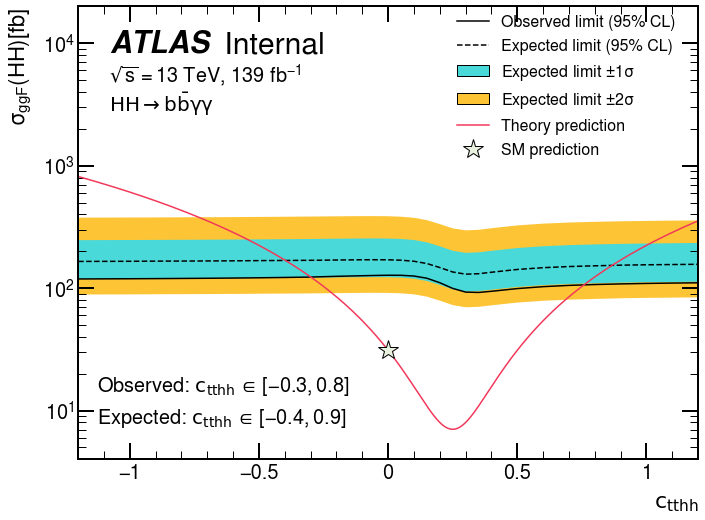

<Figure size 432x288 with 0 Axes>

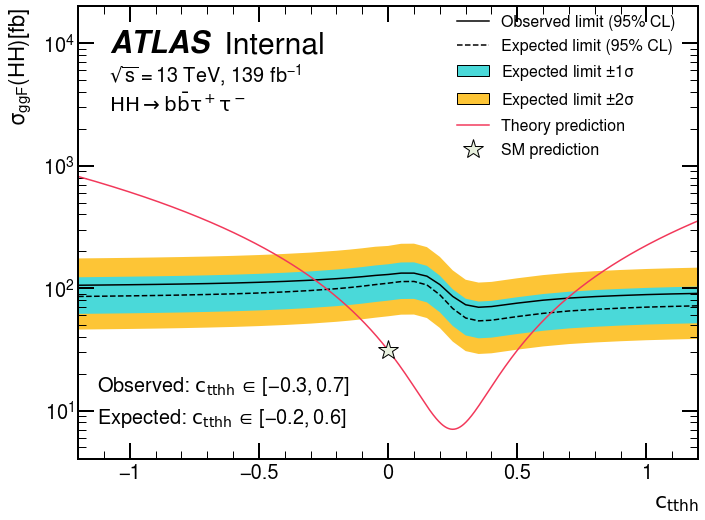

<Figure size 432x288 with 0 Axes>

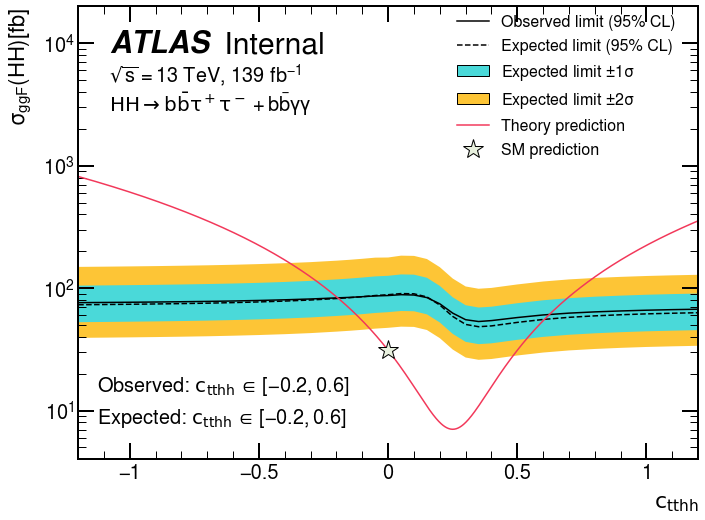

<Figure size 432x288 with 0 Axes>

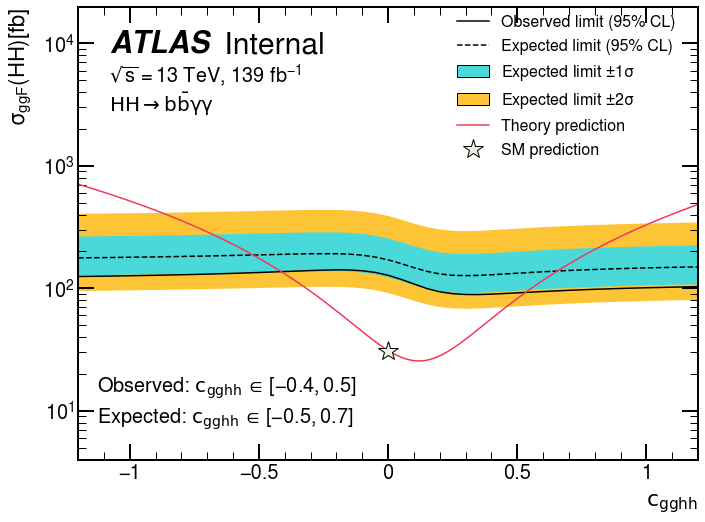

<Figure size 432x288 with 0 Axes>

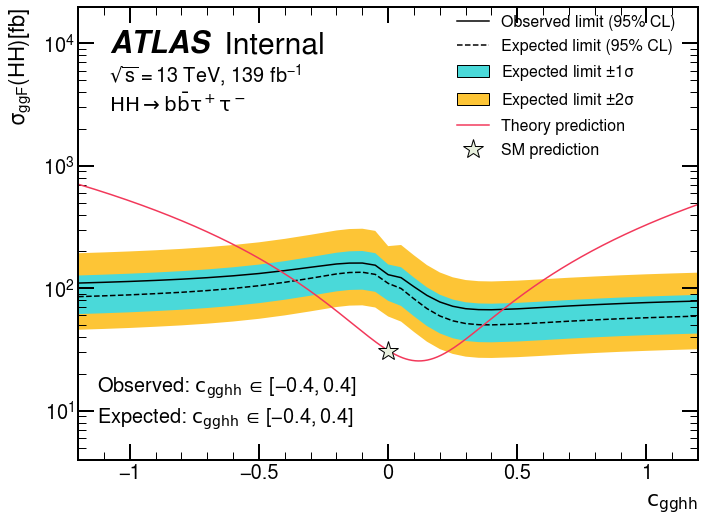

<Figure size 432x288 with 0 Axes>

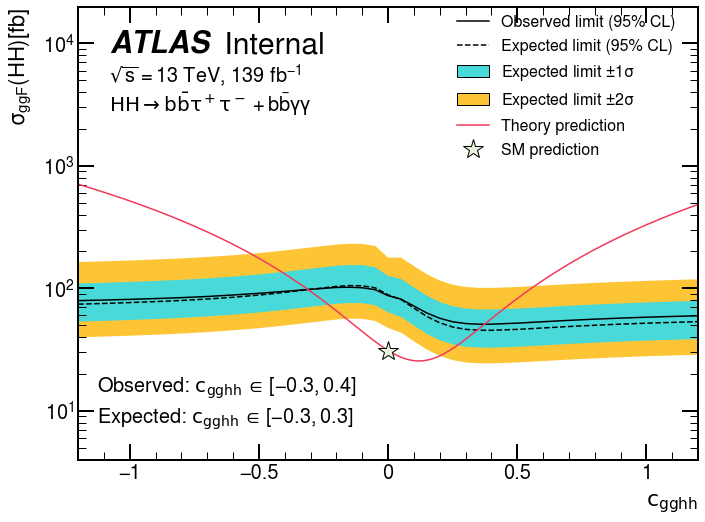

In [56]:
for parameter in limit_data:
    for channel in limit_data[parameter]:
        save_path = os.path.join(plot_outdir, f'{channel}_{parameter}_limit_scan.pdf')
        plot_limit_scan(limit_data, parameter, channel, save_as=save_path)
        plt.show()

In [41]:
limit_data['ctthh']['bbyy']

,mass,0,2,1,-1,-2,obs,inj
ctthh,,,,,,,,
-1.2,0,0.202479,0.461206,0.302132,0.145897,0.108676,0.145614,0
-1.1,0,0.233561,0.532005,0.348532,0.168294,0.125358,0.168077,0
-1.0,0,0.272356,0.620361,0.406443,0.196247,0.146180,0.196138,0
-0.9,0,0.322004,0.732598,0.479992,0.232022,0.172828,0.231844,0
-0.8,0,0.385839,0.877987,0.575309,0.278019,0.207090,0.278187,0
-0.7,0,0.470569,1.070944,0.701832,0.339071,0.252567,0.339758,0
-0.6,0,0.586302,1.334459,0.874656,0.422463,0.314684,0.424081,0
-0.5,0,0.750661,1.707121,1.119082,0.540893,0.402899,0.543623,0
-0.4,0,0.992175,2.257036,1.479962,0.714917,0.532526,0.720802,0


In [57]:
save_path

'/afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs/plots/combined_cgghh_limit_scan.pdf'